# Carga del archivo CSV

In [ ]:
import pandas as pd

df = pd.read_csv('ecg_rr_features_curado.csv')

# Inspección básica del dataset

In [5]:
print("Primeras filas del dataset:")
print(df.head())

print("\nResumen estadístico:")
print(df.describe())

print("\nTipos de datos:")
print(df.dtypes)

Primeras filas del dataset:
      mean_rr     std_rr   skew_rr   kurt_rr   label
0  849.671415  37.965868  0.404165  3.097078  Normal
1  786.173570  87.045564  0.462868  3.968645    AFib
2  864.768854  49.730056  0.278733  2.297947  Normal
3  952.302986  28.845781  0.260759  2.672338    AFib
4  776.584663  66.450898  0.662505  2.607892    AFib

Resumen estadístico:
          mean_rr     std_rr    skew_rr    kurt_rr
count   30.000000  30.000000  30.000000  30.000000
mean   781.185310  47.576751   0.502577   2.979748
std     90.000643  18.622044   0.198397   0.908822
min    608.671976  10.806598  -0.023949   1.081229
25%    740.894910  35.817727   0.397172   2.620240
50%    776.585483  48.708545   0.505122   2.969387
75%    836.033535  60.893236   0.647542   3.287354
max    957.921282  87.045564   0.812929   5.463242

Tipos de datos:
mean_rr    float64
std_rr     float64
skew_rr    float64
kurt_rr    float64
label       object
dtype: object


# Visualización de distribuciones por clase

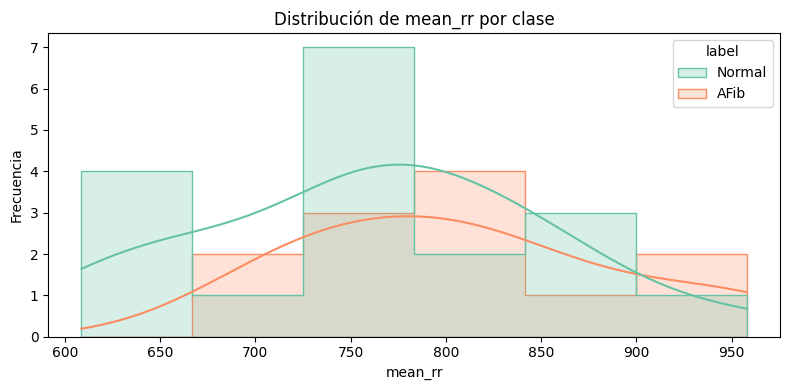

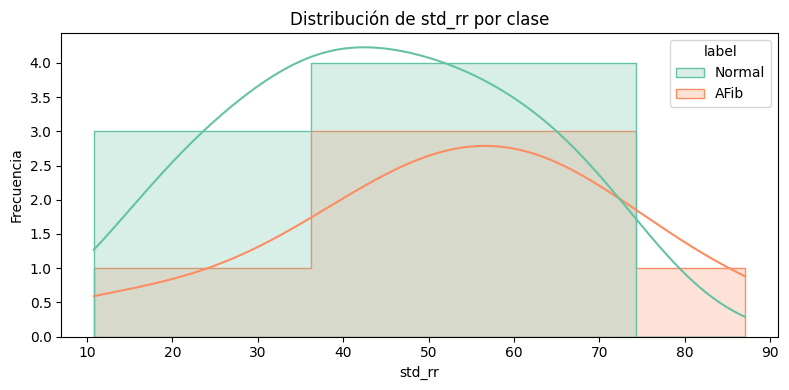

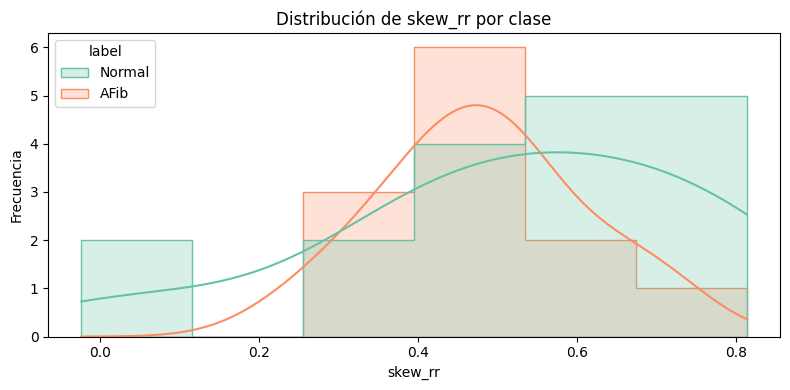

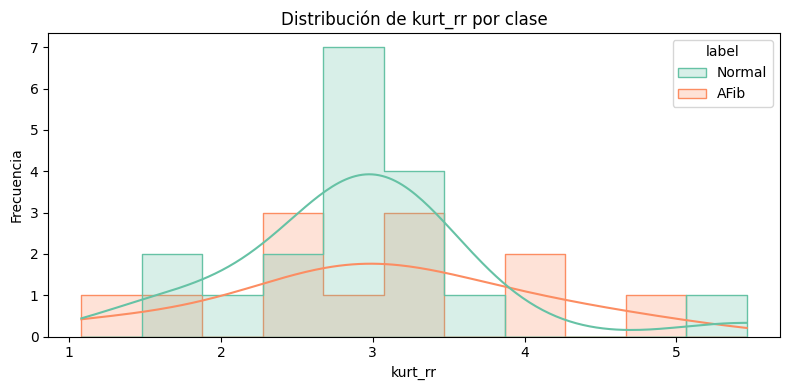

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asegurarse de que la columna de clase exista y esté nombrada correctamente
if 'class' in df.columns:
    clase_col = 'class'
else:
    clase_col = df.columns[-1]

# Visualizar variables claves
variables_a_graficar = df.select_dtypes(include='number').columns[:4] 

for col in variables_a_graficar:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, hue=clase_col, kde=True, element="step", palette="Set2")
    plt.title(f"Distribución de {col} por clase")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

# Conclusiones

## Conclusiones

### ¿Qué variables parecen diferenciar más entre clases?

Al observar las distribuciones por clase (Normal vs AFib):

- **`mean_rr`** muestra cierta separación entre clases: los valores más altos tienden a estar más presentes en la clase normal, mientras que los valores más bajos se observan más frecuentemente en AFib.
- **`std_rr`** no presenta una separación tan clara, pero hay una leve tendencia a que la clase AFib tenga valores más dispersos.
- **`skew_rr`** parece tener una distribución diferente entre clases, la clase AFib tiende a tener valores más centrados y altos, mientras que la clase Normal presenta mayor dispersión y algunos valores cercanos a cero.
- **`kurt_rr`** también difiere entre clases, con la clase normal mostrando una distribución más concentrada y la clase AFib una más dispersa y aplanada.

### ¿Qué aspectos del dataset llaman la atención?

- Las variables analizadas, mean_rr, std_rr, skew_rr y kurt_rr, presentan superposición entre clases, pero sus distintas distribuciones sugieren potencial para la clasificación.
- **skew_rr** y **kurt_rr** destacan por las diferencias en la forma de sus distribuciones entre las clases, sugiriendo que la asimetría y la curtosis de los intervalos RR son características clave para diferenciar ritmos cardíacos.
- El tamaño del dataset es pequeño, ya que al ser 30 señales, puede afectar la robustez de cualquier modelo predictivo si no se complementa con validación adecuada o datos adicionales.
- El rango y la escala de las variables son distintos, lo que requerirá normalización o estandarización para la implementación de algunos algoritmos de Machine Learning.